In [ ]:
import cv2
import numpy as np
import imutils

def centroid(contour):
    M = cv2.moments(contour)
    cx = int(round(M['m10']/M['m00']))
    cy = int(round(M['m01']/M['m00']))
    centre = (cx, cy)
    return centre

def getScore(scoreboundaries, HoleDist): #function to assign a score to each hole

    score = 0

    if scoreboundaries[0]>HoleDist:
        score = 10
    for i in range(1, len(scoreboundaries)):
        if scoreboundaries[i-1]<=HoleDist<scoreboundaries[i]:
            score = len(scoreboundaries) - i
    return score


default = cv2.imread("1.png")
img = cv2.resize(default,(640,640))

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)

v_mask = cv2.inRange(v, 0, 155)

cnts = cv2.findContours(v_mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

for c in cnts:

    if cv2.contourArea(c) > 10000: 
        cv2.drawContours(img, [c], -1, (0, 255, 0), 2)
        area_max = cv2.contourArea(c) 
        
radius_max = np.sqrt(area_max / np.pi)
section_size = radius_max / 9

centre_v_mask = cv2.inRange(v, 215, 255)
cnts = cv2.findContours(centre_v_mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

for c in cnts:
    if cv2.contourArea(c) > 10:
        centre_coords = centroid(c)
       
h_mask = cv2.inRange(h, 0, 30)
h_mask = cv2.medianBlur(h_mask, 11)
cnts = cv2.findContours(h_mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

holes = []
HoleDists = []


scoreboundaries = []
for i in range(1,10): #calculate other rings
    
    cv2.circle(img, centre_coords, int(i*(section_size)), (255, 0, 0), 1)
    scoreboundaries.append(int(i*(section_size)))

for c in cnts: #plot bullet holes

    if cv2.contourArea(c) > 1:
        x,y,w,h = cv2.boundingRect(c)
        pts =[(x, y), (x+w, y), (x, y+h), (x+w, y+h)]

        centre_holes = centroid(c)
        pts.append(centre_holes)

        pointscore = 0
        for pt in c: 
            pt = pt[0]
            X = pt[0]
            Y = pt[1]
            
            HoleDist = np.sqrt((X-centre_coords[0])**2 + (Y - centre_coords[1])**2)
            HoleDists.append(HoleDist)
            score = getScore(scoreboundaries, HoleDist)

            if score>pointscore:
                pointScore = score

        cv2.circle(img, (centre_holes), 1, (0, 0, 255), -1)
        cv2.rectangle(img, (x,y),(x+w,y+h),(0,0,255),2)
        cv2.drawContours(img, [c], -1, (0, 255, 0), 1)
        
        pointScore = score
        cv2.putText(img, "Score: " + str(pointScore), (centre_holes[0] - 20, centre_holes[1] + 20),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

cv2.imshow('frame', img)
cv2.waitKey(0)

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
width = 400
height = 400
# Charger l'image de la cible avant les tirs
before_image = cv2.imread("before.jpg")

# Charger l'image de la cible après les tirs
after_image = cv2.imread("after2.jpg")

#Redimensioner les images pour qu'elles ont les même dimensions
before_image = cv2.resize(before_image,(width,height))
after_image = cv2.resize(after_image,(width,height))

# Convertir les images en nuances de gris pour faciliter le calcul de la différence
before_gray = cv2.cvtColor(before_image, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after_image, cv2.COLOR_BGR2GRAY)

# Calculer la différence entre les deux images en nuances de gris
diff = cv2.absdiff(before_gray, after_gray)

# Appliquer un seuil pour mettre en évidence les différences
_, threshold = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)

# Utiliser l'opération morphologique "opening" pour éliminer les bruits
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
threshold = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel, iterations = 2)

# Trouver les contours des zones modifiées
contours = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

# Dessiner des cercles rouges autour des impacts de balle
for c in contours:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.circle(after_image, (x + w // 2, y + h // 2), w // 2, (0, 0, 255), 2)

# Compter le nombre de points
point_count = len(contours)

# Afficher le nombre de points dans la console
#print("Nombre d'impact de balles : ", point_count)


# Afficher l'image avec les impacts de balle surimposés
cv2.imshow("Nombre d'impact de balles : "+ str(point_count), after_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(after_image)
plt.show()


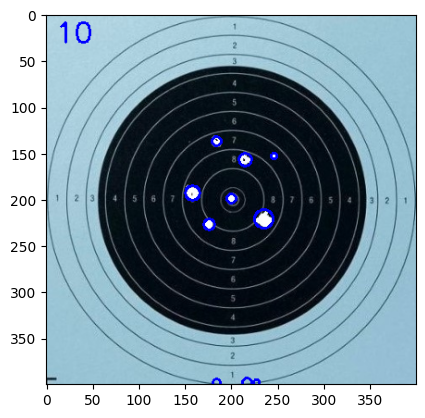

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
width = 400
height = 400
# Charger l'image de la cible avant les tirs
before_image = cv2.imread("before.jpg")

# Charger l'image de la cible après les tirs
after_image = cv2.imread("after.jpg")

#Redimensioner les images pour qu'elles ont les même dimensions
before_image = cv2.resize(before_image,(width,height))
after_image = cv2.resize(after_image,(width,height))

# Convertir les images en nuances de gris pour faciliter le calcul de la différence
before_gray = cv2.cvtColor(before_image, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after_image, cv2.COLOR_BGR2GRAY)

# Calculer la différence entre les deux images en nuances de gris
diff = cv2.absdiff(before_gray, after_gray)

# Appliquer un seuil pour mettre en évidence les différences
_, threshold = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)

# Utiliser l'opération morphologique "opening" pour éliminer les bruits
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
threshold = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel, iterations = 2)

# Trouver les contours des zones modifiées
contours = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

# Dessiner des cercles rouges autour des impacts de balle
for c in contours:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.circle(after_image, (x + w // 2, y + h // 2), w // 2, (0, 0, 255), 2)

# Compter le nombre de points
point_count = len(contours)

# Afficher le nombre de points dans un coin de l'image
cv2.putText(after_image, str(point_count), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Afficher l'image avec les impacts de balle surimposés
cv2.imshow("Nombre d'impact de balles : "+ str(point_count), after_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(after_image)
plt.show()


Total points:  74
nombre d'impacts:  14


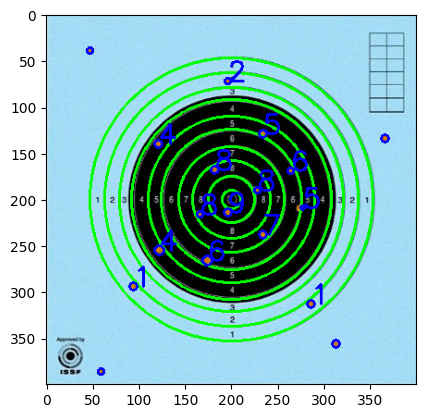

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

width = 400
height = 400
# Charger l'image de la cible avant les tirs
before_image = cv2.imread("center.jpg")

# Charger l'image de la cible après les tirs
after_image = cv2.imread("center_after_2.jpg")

#Redimensioner les images pour qu'elles ont les même dimensions
before_image = cv2.resize(before_image,(width,height))
after_image = cv2.resize(after_image,(width,height))

# Convertir les images en nuances de gris pour faciliter le calcul de la différence
before_gray = cv2.cvtColor(before_image, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after_image, cv2.COLOR_BGR2GRAY)

# Calculer la différence entre les deux images en nuances de gris
diff = cv2.absdiff(before_gray, after_gray)

# Appliquer un seuil pour mettre en évidence les différences
_, threshold = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)

# Utiliser l'opération morphologique "opening" pour éliminer les bruits
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
threshold = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel, iterations = 2)

# Trouver les contours des zones modifiées
# contours = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
contours = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

# Initialiser un compteur de points
points = 0

# Définir les centres et les rayons des cercles de points
circles = {
    "10": ((width // 2, height // 2), width // 40),
    "9": ((width // 2, height // 2), width // 16),
    "8": ((width // 2, height // 2), width // 9.5),
    "7": ((width // 2, height // 2), width // 7),
    "6": ((width // 2, height // 2), width // 5.2),
    "5": ((width // 2, height // 2), width // 4.4),
    "4": ((width // 2, height // 2), width // 3.7),
    "3": ((width // 2, height // 2), width // 3.3),
    "2": ((width // 2, height // 2), width // 2.9),
    "1": ((width // 2, height // 2), width // 2.6)
}

# # Définir les centres et les rayons des cercles de points
# circles = {
#     "9": ((width // 2, height // 2), width // 4),
#     "7": ((width // 4, height // 4), width // 8),
#     "5": ((3 * width // 4, 3 * height // 4), width // 8)
# }


for _, (center, radius) in circles.items():
    radius = int(radius)
    cv2.circle(after_image, center, radius, (0,255,0), 2)


# Dessiner des cercles rouges autour des impacts de balle
total_points = 0
points = {point: 0 for point in circles.keys()}
for c in contours:
    (x, y, w, h)= cv2.boundingRect(c)
    cv2.circle(after_image, (x + w // 2, y + h // 2), w // 2, (0, 0, 255), 2)
    
    center = (x + w // 2, y + h // 2)
    for point, (circle_center, radius) in circles.items():
        distance = cv2.norm(np.array(center), np.array(circle_center))
        if distance <= radius:
            points[point] += 1
            cv2.putText(after_image, point, (x + w // 2, y + h // 2), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            total_points += int(point)
            break



# Vérifier dans quel cercle se trouve l'impact
# for name, (center, radius) in circles.items():
#     distance = cv2.norm(center, (x + w // 2, y + h // 2))
#     if distance < radius:
#         points += int(name)
#         # Ajouter le nombre de points de l'impact dans l'image
#         cv2.putText(after_image, name, (x + w // 2, y + h // 2), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
#         break


print("Total points: ", total_points)

print("nombre d'impacts: ", sum(points.values()))

cv2.imshow("Nombre de points : "+ str(total_points), after_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(after_image)
plt.show()

Total points:  59
nombre d'impacts:  10


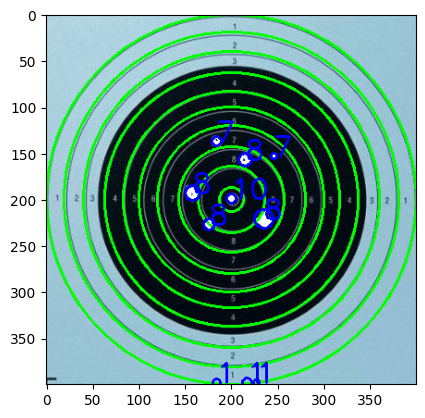

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# Charger l'image de la cible après les tirs
after_image = cv2.imread("after.jpg")

#Redimensioner les images pour qu'elles ont les même dimensions
before_image = cv2.resize(before_image,(width,height))
after_image = cv2.resize(after_image,(width,height))

# Convertir l'image en espace de couleur HSV
hsv = cv2.cvtColor(after_image, cv2.COLOR_BGR2HSV)

# Définir les limites de la plage de couleur pour les impacts de la cible
lower_color = (0, 0, 0)
upper_color = (180, 255, 90)

# Appliquer le filtrage par couleur pour masquer les zones de l'image qui ne contiennent pas les impacts de la cible
mask = cv2.inRange(hsv, lower_color, upper_color)

# Appliquer le masque à l'image pour isoler les impacts de la cible
res = cv2.bitwise_and(after_image, after_image, mask= mask)

# Utiliser l'opération morphologique "opening" pour éliminer les bruits
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
res = cv2.morphologyEx(res, cv2.MORPH_OPEN, kernel, iterations = 2)

# Trouver les contours des zones modifiées
contours = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]


# Initialiser un compteur de points
points = 0

# Définir les centres et les rayons des cercles de points
circles = {
    "10": ((width // 2, height // 2), width // 30),
    "9": ((width // 2, height // 2), width // 11),
    "8": ((width // 2, height // 2), width // 7),
    "7": ((width // 2, height // 2), width // 5),
    "6": ((width // 2, height // 2), width // 4),
    "5": ((width // 2, height // 2), width // 3.4),
    "4": ((width // 2, height // 2), width // 2.9),
    "3": ((width // 2, height // 2), width // 2.5),
    "2": ((width // 2, height // 2), width // 2.2),
    "1": ((width // 2, height // 2), width // 2),
    # "7": ((width // 4, height // 4), width // 8),
    # "5": ((3 * width // 4, 3 * height // 4), width // 8)
}

# # Définir les centres et les rayons des cercles de points
# circles = {
#     "9": ((width // 2, height // 2), width // 4),
#     "7": ((width // 4, height // 4), width // 8),
#     "5": ((3 * width // 4, 3 * height // 4), width // 8)
# }


for _, (center, radius) in circles.items():
    radius = int(radius)
    cv2.circle(after_image, center, radius, (0,255,0), 2)


# Dessiner des cercles rouges autour des impacts de balle
# for c in contours:
#     (x, y, w, h)= cv2.boundingRect(c)
#     cv2.circle(after_image, (x + w // 2, y + h // 2), w // 2, (0, 0, 255), 2)
total_points = 0
points = {point: 0 for point in circles.keys()}
for c in contours:
    (x, y, w, h)= cv2.boundingRect(c)
    cv2.circle(after_image, (x + w // 2, y + h // 2), w // 2, (0, 0, 255), 2)
    
    center = (x + w // 2, y + h // 2)
    for point, (circle_center, radius) in circles.items():
        distance = cv2.norm(np.array(center), np.array(circle_center))
        if distance <= radius:
            points[point] += 1
            cv2.putText(after_image, point, (x + w // 2, y + h // 2), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            total_points += int(point)
            break



# Vérifier dans quel cercle se trouve l'impact
# for name, (center, radius) in circles.items():
#     distance = cv2.norm(center, (x + w // 2, y + h // 2))
#     if distance < radius:
#         points += int(name)
#         # Ajouter le nombre de points de l'impact dans l'image
#         cv2.putText(after_image, name, (x + w // 2, y + h // 2), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
#         break


print("Total points: ", total_points)

print("nombre d'impacts: ", sum(points.values()))

cv2.imshow("Nombre de points : "+ str(total_points), after_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(after_image)
plt.show()

In [ ]:
import cv2
import numpy as np

# charger l'image 
image = cv2.imread("before1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer la détection des contours
contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Trouver le contour qui correspond à la ligne souhaitée
for c in contours:
    # ici vous pourriez utiliser les propriétés des contours comme leur longueur ou leur forme pour identifier la ligne souhaitée
    if cv2.contourArea(c) > 100:
        x, y, w, h = cv2.boundingRect(c)
        break

# Recadrer l'image en utilisant les coordonnées trouvées
cropped = image[y:y+h, x:x+w]

# Enregistrer ou afficher l'image recadrée
cv2.imshow("Cropped", cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()
